<a href="https://colab.research.google.com/github/DikshantBadawadagi/MicroGrad-Network/blob/main/MicroGrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
def f(x):
  return 2*x**2 - 4*x -19

In [61]:
print(f(10))

141


In [62]:
xs = np.arange(-10,11,1)
xs

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [63]:
y =f(xs)
print(y)

[221 179 141 107  77  51  29  11  -3 -13 -19 -21 -19 -13  -3  11  29  51
  77 107 141]


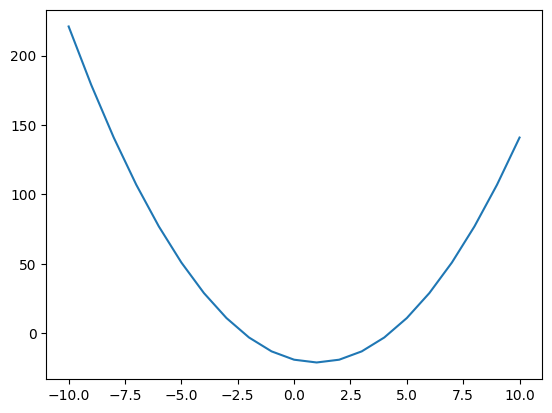

In [64]:
plt.plot(xs,y)

In [65]:
h = 0.000001
x =5
print((f(x+h) - f(x))/h)

16.00000200241425


In [66]:
a = 2.0
b = -4.0
c = 10.0

d = a*b +c

In [67]:
d

2.0

In [68]:
h = 0.000001
a = 2.0
b = -4.0
c = 10.0
c = c+h
d1 = a*b + c
d1

2.0000009999999993

In [69]:
(d1- d)/h

0.9999999992515995

In [70]:
class Value:

  def __init__(self,data, _children=(),_op='', label=''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label
  def __repr__(self):
    return f"Value(data={self.data})"
  def __add__(self,other):
    out = Value(self.data + other.data,(self,other),'+')
    return out
  def __mul__(self,other):
    out = Value(self.data * other.data,(self,other),'*')
    return out

a = Value(2.0, label='a')
b = Value(-3.0,label='b')
c = Value(8.0,label='c')
e = a*b; e.label='e'
d= e + c;d.label = 'd'
f = Value(-2.0, label='f')
L = d*f;L.label='L'
L

Value(data=-4.0)

In [71]:
d._prev

{Value(data=-6.0), Value(data=8.0)}

In [72]:
d._op

'+'

In [73]:
from graphviz import Digraph
def trace(root):
  nodes,edges =set(),set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child,v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg',graph_attr={'rankdir':'LR'})

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name = uid, label = "{ %s | data %.4f }"% (n.label, n.data), shape='record')
    if n._op:
      dot.node(name = uid + n._op, label = n._op)
      dot.edge(uid + n._op, uid)

  for n1,n2 in edges:
    dot.edge(str(id(n1)),str(id(n2)) + n2._op)
  return dot

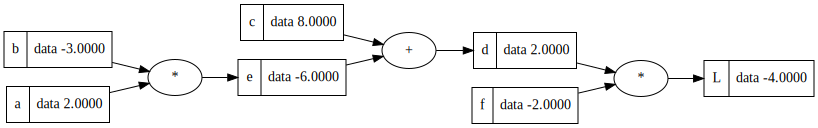

In [74]:
draw_dot(L)